# Wholesale Customer Dataset - Project 2
> Name: Sharun Garg  
Student ID: 200493338

## Importing important Libraries

In [1]:
# importing all the necessary libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA 
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Reading the excel file of data as Pandas Dataframe

In [2]:
file = "Wholesale customers data.xlsx"
data = pd.read_excel(file)

# Printing a sample of random rows from the dataframe sample

In [3]:
data.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
228,1,1,1869,577,572,950,4762,203
184,1,3,327,918,4710,74,334,11
162,1,3,15177,2024,3810,2665,232,610
319,2,2,9759,25071,17645,1128,12408,1625
399,1,3,9612,577,935,1601,469,375
72,1,3,4420,5139,2661,8872,1321,181
173,2,3,514,7677,19805,937,9836,716
349,2,3,5981,14641,20521,2005,12218,445
258,1,1,56083,4563,2124,6422,730,3321
268,2,1,11908,8053,19847,1069,6374,698


### Explanation of the columns in dataset

> - **Channel** (Integer) - Customer channel. Horeca = 1, Retail = 2 .
> - **Region** (Integer) - Customer region. Lisbon = 1, Oporto = 2, or Others = 3.
> - **Fresh** (Integer) - length of the flower petal in cms.
> - **Milk** (Integer) - annual spending on milk products.
> - **Grocery** (Integer) - annual spending on grocery products.
> - **Frozen** (Integer) - annual spending on frozen products.
> - **Detergents_Paper** (Integer) - annual spending on detergents and paper products.
> - **Delicatessen** (Integer) - annual spending (m.u.)on and delicatessen products. 
>  
>  
> Reference: [Link to the dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

# EDA and Data Wrangling

### Getting the info on dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


> As we can see there are no missing values and the data that we have is already in integer format

### Getting metrics about our data

In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


> We can observe that the continuous variables in our data **Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen** have high standard deviation, so our data is normal spread normally. We may have to standardise the data.

### Checking for null values

In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

> **Observation:**  
There are no null values and our data is complete.

### Checking for the different types of "Channels" in dataset

In [7]:
data["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

> **Oberservation:**  
There are two channel types, with values 1 (Horeca) and 2 (Retail). The channel is already in binary format, so we can  tranform these values to 0 and 1. But for keeping the uniformity, the values of 1 and 2 are kept and used forward.

### Checking for different types of "Regions" in dataset

In [8]:
data["Region"].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

> **Oberservation:**  
There are three Region types, with values 1 (Lisbon) and 2 (Oporto), and 3 (Othere). Our data has most number of entries for Lisbon Region.

### Splitting the data into "features" and "target"

In [9]:
data_copy = data.copy()
features = data_copy.drop(["Channel"], axis = 1)
target = data_copy["Channel"]

### Heatmap between the data variables

<AxesSubplot:>

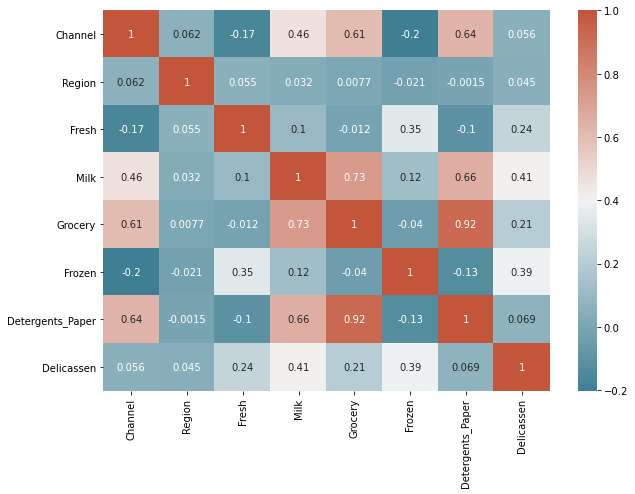

In [10]:
corr = data.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

> **Observation:**  
> - We can oberserve that **Grocery** and **Detergent_Papers** are highly correlated features with a correlation of 0.92. As both of them are continuous variables, there may be some relation between them where the sale of these categories are influenced by one another.  
> - Other significantly correlated pairs are **Milk** and **Grocery** with a correlation of 0.73, and **Milk** and **Detergent_Papers** with a correlation of 0.66.  
> - As channel is a categorical variable, we'll not be considering the correlation of it here.

In [11]:
#Helper functions

def outliers(feature, df):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 3*iqr
    upper_bound = q3 + 3*iqr
    
    index_list = df.index[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return index_list

def histograms(df, attribute):
    att = df[attribute].values
    sns.distplot(a=df[attribute], kde=False, color='b')
    plt.ylabel("Number of datapoints")
    plt.show()
    
def plot_scaled_data(scaled_data, range_min, range_max, step):    
    colors = ['r','b','g','c','m','y', 'k']
    plt.subplots(figsize=(14,9))
    i = 0
    for att in scaled_data.columns.values:
        plot1 = plt.hist(scaled_data[att], color = colors[i], alpha = 0.5, bins = np.arange(range_min, range_max, step), label = att)
        i = i + 1
    plt.legend(loc="upper right")
    plt.show()

### Plotting the data spread for each variable using quantiles.

<AxesSubplot:>

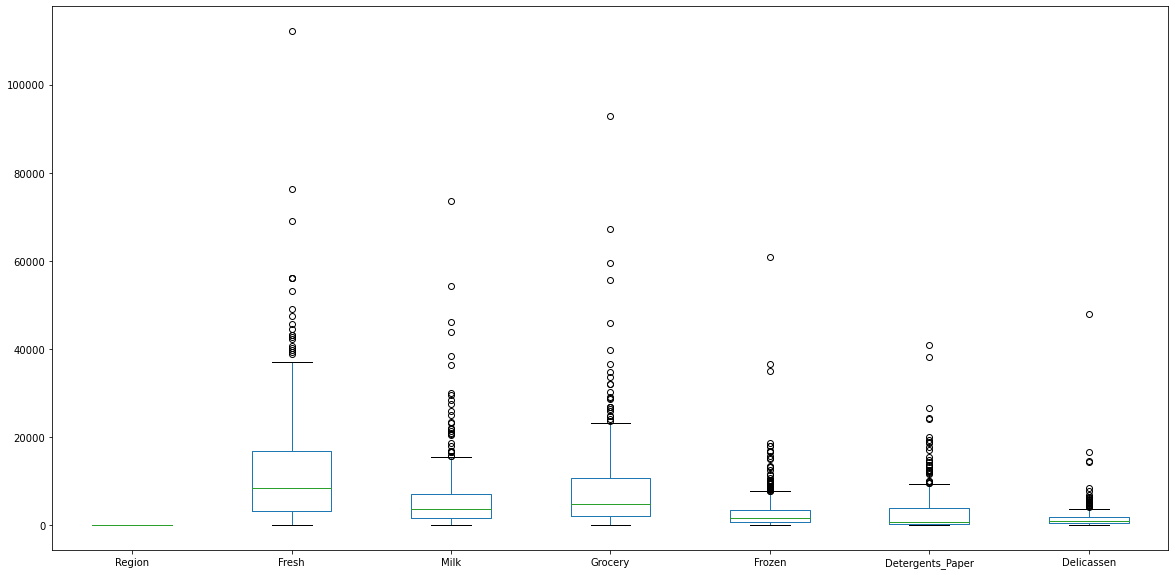

In [12]:
plt.figure(figsize=(20, 10))
features.boxplot(column=[name for name in list(features)], grid=False)

> **Observation:**  
> We can oberserve that the are a lot of outliers outside the upper bound for all of our variables with a span of range of about 50000. We'll be dealing with these outliers now.

### Fetching the list of indices with outliers
As our data is small and there are a lot of outliers, we'll be keeping a higher upper and lower bound for quantiles so that there's not a lot of data loss.

In [13]:
index_list = []

for feature in features.columns.values:
    index_list.extend(outliers(feature, features))
index_list = sorted(set(index_list))
len(index_list)

38

> There are 38 rows with outliers that can be dropped from our dataset.

In [14]:
features.drop(index_list, inplace=True)
target.drop(index_list, inplace=True)

### Plotting the cleaned data after removing the outliers.

<AxesSubplot:>

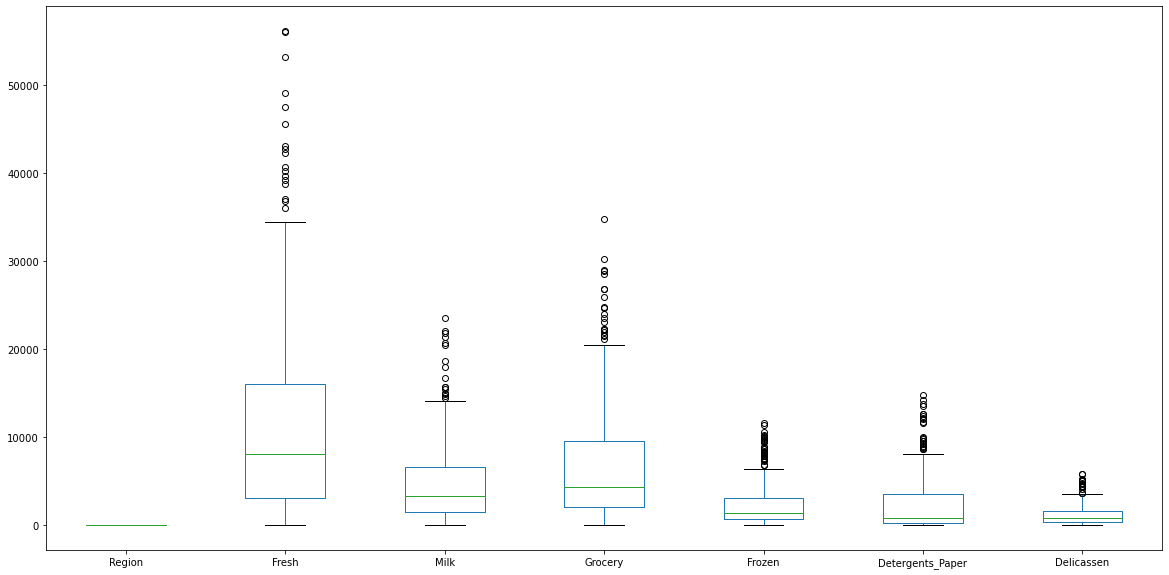

In [15]:
plt.figure(figsize=(20, 10))
features.boxplot(column=[name for name in list(features)], grid=False)

> As we can see, the data is rid of most of the outliers and the datapoints outside our quantiles are not spread over a large range.

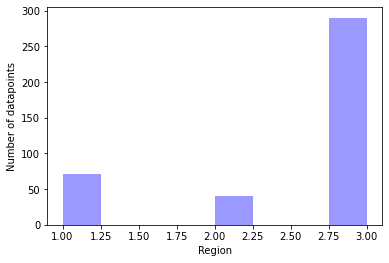

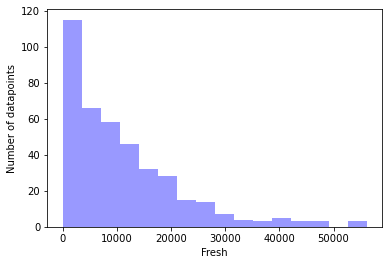

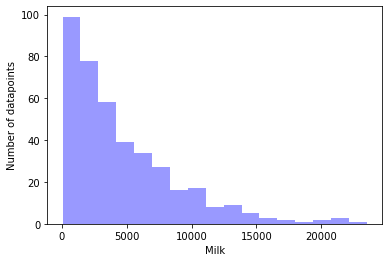

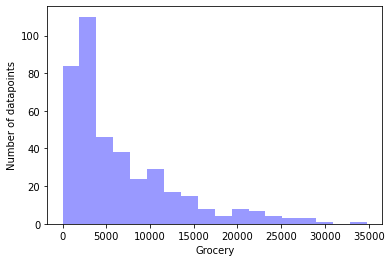

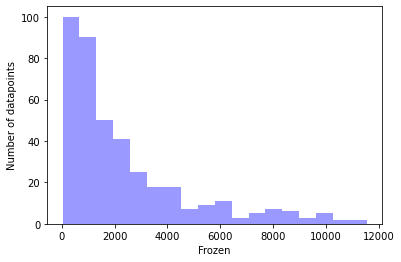

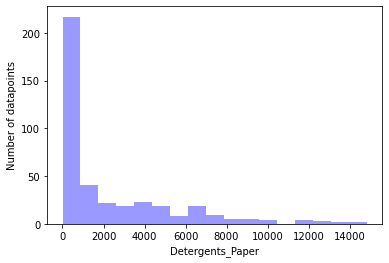

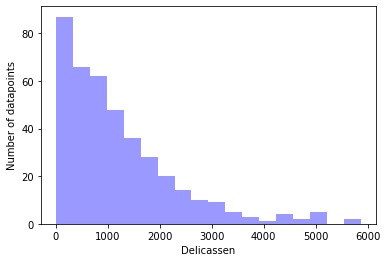

In [16]:
for col in features.columns:
    histograms(features, col)

> The variables data looks closely packed with most of the data in the lower bound of the values, and the density decreasin exponentially towards higher range.

# Scaling the data for analysis

## Standard Scaler

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
std_scaled_feat = pd.DataFrame(scaled_data, columns = features.columns)
std_scaled_feat.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.587091,0.157530,1.150833,0.143097,-0.874394,0.128160,0.131036
1,0.587091,-0.379366,1.186704,0.459475,-0.242005,0.332651,0.529542
2,0.587091,0.214549,-0.819709,-0.383411,1.654343,-0.587723,0.540460
3,0.587091,1.109056,0.161835,0.085875,0.637538,-0.168170,3.631153
4,0.587091,-0.153969,0.825438,-0.240750,-0.689743,-0.162223,0.233847


In [18]:
std_scaled_feat.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02
mean,-7.937266e-16,-5.523498e-19,5.799673e-17,4.115006e-17,-7.291017e-17,1.546579e-17,7.401487e-17
std,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00
min,-1.992258e+00,-1.054216e+00,-1.085476e+00,-1.048325e+00,-9.516037e-01,-7.542225e-01,-1.083587e+00
25%,-7.025838e-01,-7.589333e-01,-7.599060e-01,-7.228439e-01,-6.894363e-01,-6.717159e-01,-7.269340e-01
50%,5.870906e-01,-2.829311e-01,-3.148452e-01,-3.724557e-01,-3.862126e-01,-5.001782e-01,-3.256988e-01
75%,5.870906e-01,4.851972e-01,4.376179e-01,4.653864e-01,2.975471e-01,4.273810e-01,4.162677e-01
max,5.870906e-01,4.318185e+00,4.381731e+00,4.435717e+00,3.760261e+00,4.147611e+00,4.248927e+00


> **Observation:**  
> As we can see that all our features are spread across a narrow range with standard deviation of 1.

<AxesSubplot:ylabel='Density'>

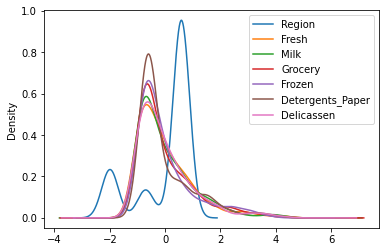

In [19]:
pd.DataFrame(std_scaled_feat).plot(kind='kde')

> **Observation:**  
> The data looks very normally spread now, except for **Region** variable. As region variable is a categorical variable, that's why we see the non-normal distribution.

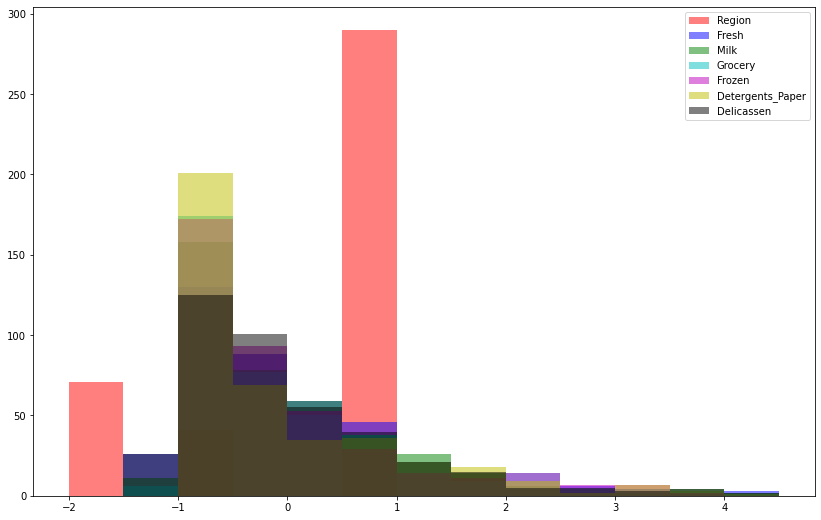

In [20]:
plot_scaled_data(std_scaled_feat, -2, 5, 0.5)

> The variables are scaled with most of the point falling in the regions of -1 to 1, and exponentially decreasing.

## Min Max Scaler

In [21]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)
min_max_feat = pd.DataFrame(scaled_data, columns = features.columns)
min_max_feat.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.225550,0.409041,0.217253,0.016386,0.180011,0.227777
1,1.0,0.125614,0.415602,0.274943,0.150598,0.221728,0.302508
2,1.0,0.236164,0.048611,0.121245,0.553061,0.033967,0.304556
3,1.0,0.402664,0.228144,0.206818,0.337264,0.119558,0.884149
4,1.0,0.167569,0.349523,0.147259,0.055575,0.120771,0.247057


In [22]:
min_max_feat.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.772388,0.196228,0.198543,0.191159,0.201959,0.153865,0.203204
std,0.388178,0.186368,0.183137,0.182574,0.212495,0.204260,0.187762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.054963,0.059550,0.059351,0.055640,0.016832,0.066883
50%,1.000000,0.143564,0.140955,0.123243,0.119993,0.051826,0.142126
75%,1.000000,0.286541,0.278587,0.276021,0.265108,0.241053,0.281266
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> **Observation:**  
> As we can see that all our features are spread across a narrow range of 0 to 1.

<AxesSubplot:ylabel='Density'>

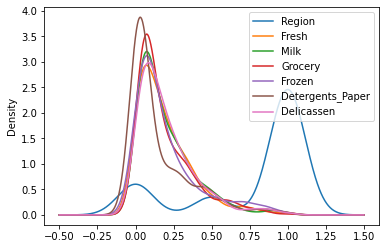

In [23]:
pd.DataFrame(min_max_feat).plot(kind='kde')

> **Observation:**  
> Unlike Standard Scaled data, the distribution is not very normal in min max scaled data.

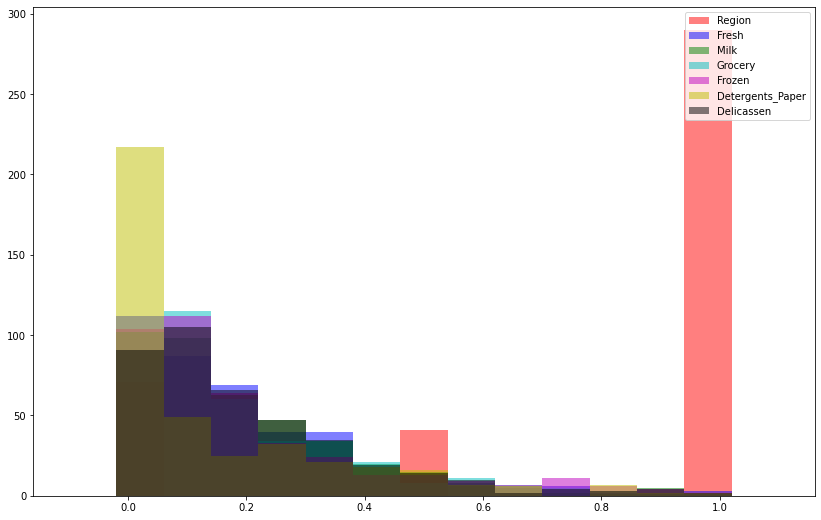

In [24]:
plot_scaled_data(min_max_feat, -0.1, 1.1, 0.08)

> Similar to standard scaled data, we see most of our data concentrated at lower bound, and exponentially decreasing.

**RESULT**:
We'll be using *Standard Scaled* data for further analysis as it gave a normally distributed data with even overlapping for all the variables. Also Min-Max scaler is not very good with outliers.

# RFECV for Optimal number of features

In [25]:
# Helper Functions

def rfecv_score(model, features, labels):
    cv = StratifiedKFold(n_splits=5)
    rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
    rfecv.fit(features, labels)
    print('Model: {}\nOptimal number of features = {} \nImportant Features: {}\n'.format(type(model).__name__, 
                                                                                   rfecv.n_features_, 
                                                                                   features.columns[rfecv.support_]))
    rfecv_ranks = pd.DataFrame(rfecv.ranking_, index=features.columns, columns = ['Ranking']).sort_values(by='Ranking', ascending=True)
    print("\n\nFeatures Ranking by RFECV\n")
    print(rfecv_ranks)
    print("\n\n")
    plot_rfecv_cross_val(rfecv)
    
def plot_rfecv_cross_val(rfecv):
    plt.figure(figsize=(10,5))
    plt.xlabel("No. of selected features")
    plt.ylabel("Cross validation score")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

### Getting a baseline cross validation score for 3 different classifiers on the entire dataset.

In [26]:
svc = SVC()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()

models = [svc, rf, gbc]
print("------- CROSS VALIDATION SCORE -------\n")
for model in models:
    scores = cross_val_score(model, std_scaled_feat, target, cv = 5)
    print("Cross Validation Score of {} model \n=> {} (+/-{})\n".format(type(model).__name__, 
                                                                                          round(np.mean(scores), 2), 
                                                                                          round(np.std(scores)*2, 2))) 

------- CROSS VALIDATION SCORE -------

Cross Validation Score of SVC model 
=> 0.88 (+/-0.04)

Cross Validation Score of RandomForestClassifier model 
=> 0.91 (+/-0.03)

Cross Validation Score of GradientBoostingClassifier model 
=> 0.89 (+/-0.07)



> **We can see our classifiers did pretty well on cross validation score of near 90% with a very small standard deviation.**

### RFECV using GradientBoostingClassifier

Model: GradientBoostingClassifier
Optimal number of features = 5 
Important Features: Index(['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')



Features Ranking by RFECV

                  Ranking
Milk                    1
Grocery                 1
Frozen                  1
Detergents_Paper        1
Delicassen              1
Fresh                   2
Region                  3





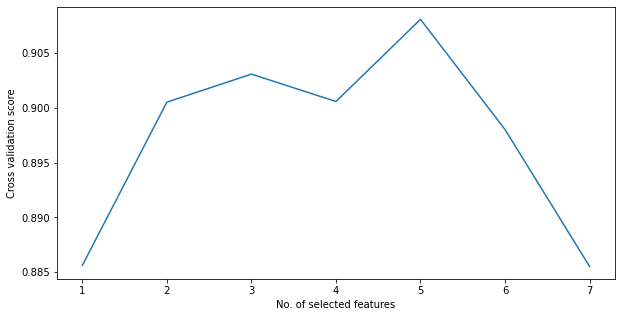

In [27]:
rfecv_score(gbc, std_scaled_feat, target)

> **Observation:**  
> The Gradient Boosting Classifier gave 5 optimal number of features with a cross validation score of nearly 91%. The **Region** variable is least important as per the classifier analysis.  

### RFECV using Random Forest Classifier

Model: RandomForestClassifier
Optimal number of features = 5 
Important Features: Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper'], dtype='object')



Features Ranking by RFECV

                  Ranking
Fresh                   1
Milk                    1
Grocery                 1
Frozen                  1
Detergents_Paper        1
Delicassen              2
Region                  3





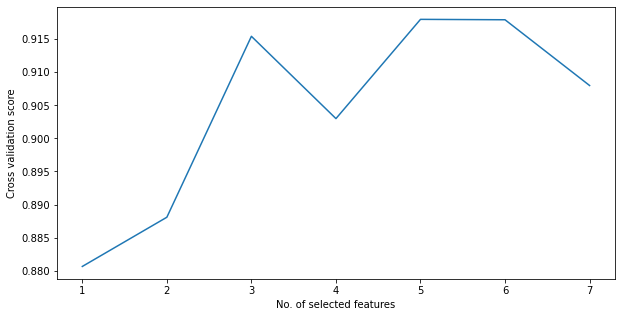

In [28]:
rfecv_score(rf, std_scaled_feat, target)

> **Observation:**  
> The Random Forest Classifier also gave 5 optimal number of features with a cross validation score of nearly 92%. Similar to Gradient Boosting Classifier, the **Region** variable is least important as per the classifier analysis.  

> **Result:**  
> As per both the classifiers and their Cross Validaton Score, we can see the the optimal number of features are 5 with Important features = Milk, Grocery, Frozen, Detergent_Papers. Fresh and Delicassen variable is not common for both these classifiers.  
> Region is the least important feature here in classifying the target "Channel"

# K-Means Clustering for K = 2  to  K = 15

In [29]:
def plot_elbow(var, name):
    plt.figure(figsize=(11, 7))
    plt.plot(range(2, 16), var, 'rx-')
    plt.title(f'Elbow Method using {name}')
    plt.xlabel('Number of clusters')
    plt.ylabel(f'{name}')
    plt.show()

In [30]:
distortions = []
inertias = []
K = range(2, 16)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(std_scaled_feat)
    inertias.append(model.inertia_)
    distortions.append(sum(np.min(cdist(std_scaled_feat, model.cluster_centers_,
                                        'euclidean'), axis=1)) / std_scaled_feat.shape[0])
    

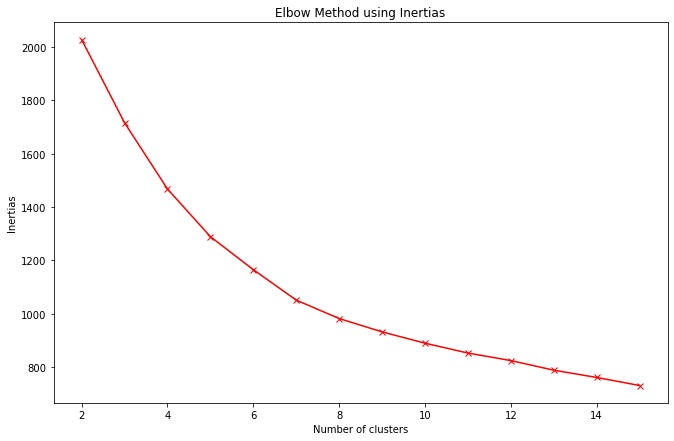

In [31]:
plot_elbow(inertias, "Inertias")

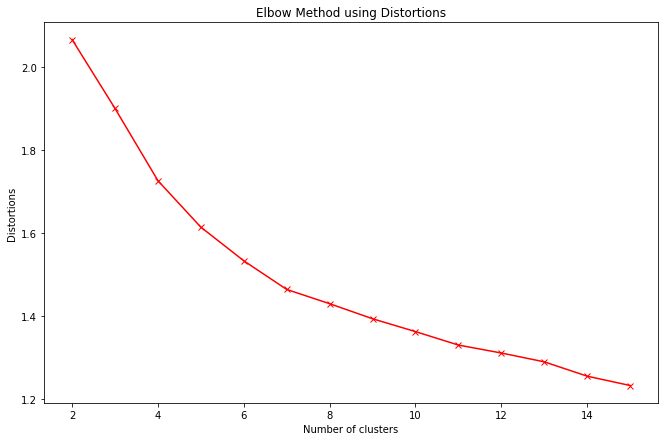

In [32]:
plot_elbow(distortions, "Distortions")

###  Observation:  
> As from both distortions and inertia graphs, we can see that the optimal number of clusters are around **6 and 7**, with **7** being more prominent number due to a linear behaviour of our graph after that point.

### KMeans clustering the 7 number of clusters

In [33]:
km = KMeans(n_clusters=7)
km.fit(std_scaled_feat)
km.inertia_

1052.6368466852898

In [34]:
a = pd.Series(km.labels_).sort_values(ascending=True)
a.value_counts().sort_index()

0    127
1     37
2     72
3     35
4     71
5     29
6     31
dtype: int64

**The data is clustered into 7 groups and we can see the most number of our datapoints falling into cluster 0**

# Principal Component Analysis

In [35]:
# Helper Functions

def pca_metrics(pca, components):
    with np.printoptions(precision=3):
        print(f"With components = {components}")
        print("Explained Variance: {}\nExplained Variance Ratio: {}\nExplained Variance Ratio sum: {}".format(pca.explained_variance_,
                                                                                                             pca.explained_variance_ratio_,
                                                                                                             round(pca.explained_variance_ratio_.sum(),3)))
    

def plot_pca_clusters(pca_trans, comp1, comp2, comp1_label, comp2_label):
    plt.figure(figsize = (8,8))
    sns.set()
    sns.scatterplot(pca_trans[:,comp1], pca_trans[:,comp2],
                    hue=km.labels_, 
                    palette="gist_rainbow",
                    s=50, alpha=0.6).set_title('7 Clusters', fontsize=15)
    plt.legend()
    plt.ylabel(comp1_label)
    plt.xlabel(comp2_label)
    plt.show()

### PCA with 2 Components

In [36]:
pca_2_comp = PCA(n_components=2)
pca_2_trans = pca_2_comp.fit_transform(std_scaled_feat)
pca_metrics(pca_2_comp, 2)

With components = 2
Explained Variance: [2.725 1.431]
Explained Variance Ratio: [0.388 0.204]
Explained Variance Ratio sum: 0.592


> **Observation:**  
> The 1st principal explains around 39% percent of variance in our data and the 2nd principal around 20%. Collectively both the components explains 60% of variance. Mostly collective variance of over 80% is preffered. 

### PCA with 4 components

In [37]:
pca_4_comp = PCA(n_components=4)
pca_4_trans = pca_4_comp.fit_transform(std_scaled_feat)
pca_metrics(pca_4_comp, 4)

With components = 4
Explained Variance: [2.725 1.431 1.022 0.709]
Explained Variance Ratio: [0.388 0.204 0.146 0.101]
Explained Variance Ratio sum: 0.839


> **Observation:**  
> The 1st principal component explains around 39% percent of variance in our data and the 2nd principal around 20%. The 3rd covers 15% and the 4th explains 10% Collectively all 4 components explains 84% of variance. PCA with 4 components should be considered than PCA with 2 components.

### Plotting the clusters for the first two components

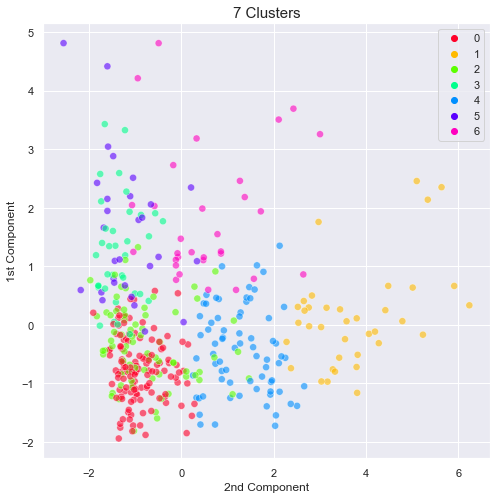

In [38]:
plot_pca_clusters(pca_2_trans, 0, 1, "1st Component", "2nd Component")

> We can see the 7 clusters here for only the first 2 components. As not much variance is expalained by first two components, the cluster are not separated sharply as evident from the plot.

### Plotting the clusters for the last two components

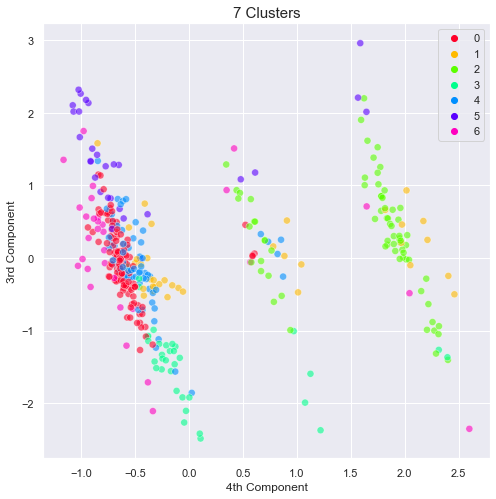

In [39]:
plot_pca_clusters(pca_4_trans, 2, 3, "3rd Component", "4th Component")

# XGBoost Classification

In [40]:
## Helper Methods

def tune_hyperparameters(model, input_params, features, labels):
    cv = GridSearchCV(model, input_params, cv=5)
    cv.fit(features, labels)
    model_results(cv)
    
def model_results(results):
    print(f"Best Parameters: {results.best_params_}\n")
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, param in zip(means, stds, results.cv_results_['params']):
        print(f"{round(mean, 3)} (+/- {round(std*2, 3)}) for {param}")
        
def model_test_performance(model, training_set, test_set):
    model.fit(training_set['features'], training_set['labels']) # fitting on training set
    label_pred = model.predict(test_set['features']) # predicting on set other than training set
    label_true = test_set['labels']
    acc = round(accuracy_score(label_true, label_pred)*100, 2)
    prc = round(precision_score(label_true, label_pred, average='micro')*100, 2)
    rcl = round(recall_score(label_true, label_pred, average='micro')*100, 2)
    f1 = round(f1_score(label_true, label_pred)*100, 2)
    return({'acc': acc, 'prc': prc, 'rcl': rcl, 'f1': f1})

### Hypertuning the classifier for finding the 3 optimal parameters for our classifier

In [41]:
gb_parameters = {
    'n_estimators': [10, 50, 100, 250, 500],
    'learning_rate': [0.01, 0.1, 1, 10, None],
    'eval_metric': ['rmse', 'logloss', 'mlogloss']
}

tune_hyperparameters(model = XGBClassifier(), input_params = gb_parameters, features = std_scaled_feat, labels= target)

Best Parameters: {'eval_metric': 'rmse', 'learning_rate': 0.1, 'n_estimators': 10}

0.895 (+/- 0.05) for {'eval_metric': 'rmse', 'learning_rate': 0.01, 'n_estimators': 10}
0.913 (+/- 0.053) for {'eval_metric': 'rmse', 'learning_rate': 0.01, 'n_estimators': 50}
0.918 (+/- 0.037) for {'eval_metric': 'rmse', 'learning_rate': 0.01, 'n_estimators': 100}
0.918 (+/- 0.026) for {'eval_metric': 'rmse', 'learning_rate': 0.01, 'n_estimators': 250}
0.92 (+/- 0.026) for {'eval_metric': 'rmse', 'learning_rate': 0.01, 'n_estimators': 500}
0.923 (+/- 0.043) for {'eval_metric': 'rmse', 'learning_rate': 0.1, 'n_estimators': 10}
0.915 (+/- 0.019) for {'eval_metric': 'rmse', 'learning_rate': 0.1, 'n_estimators': 50}
0.913 (+/- 0.022) for {'eval_metric': 'rmse', 'learning_rate': 0.1, 'n_estimators': 100}
0.915 (+/- 0.025) for {'eval_metric': 'rmse', 'learning_rate': 0.1, 'n_estimators': 250}
0.91 (+/- 0.03) for {'eval_metric': 'rmse', 'learning_rate': 0.1, 'n_estimators': 500}
0.898 (+/- 0.037) for {'eval_

## Creating the classifier with optimal input parameters

In [42]:
xgb = XGBClassifier(learning_rate= 0.1, n_estimators= 10, eval_metric= 'rmse')
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eval_metric='rmse',
              gamma=None, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.1,
              max_delta_step=None, max_depth=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, validate_parameters=None,
              verbosity=None)

## 5 Fold Cross Validation and Performance Metric

In [43]:
cv = StratifiedKFold(n_splits=5)
metrics = ['accuracy', 'precision', 'recall', 'f1']
print("5 Fold Cross validation metrics for Extreme Gradient Boos Classifier:\n")
for m in metrics:
    score = cross_val_score(xgb, std_scaled_feat, target, cv=cv, scoring=m)
    print(f"{m}: {round(score.mean()*100,2)}%")

5 Fold Cross validation metrics for Extreme Gradient Boos Classifier:

accuracy: 92.28%
precision: 95.0%
recall: 93.88%
f1: 94.39%


## Also testing the classifier on training and test set.

In [44]:
feat_train, feat_test, label_train, label_test = train_test_split(std_scaled_feat, target, train_size=0.75)

In [45]:
xgb = XGBClassifier(learning_rate= 0.1, n_estimators= 10, eval_metric= 'rmse')
training_set = {'features': feat_train, 'labels': label_train}
test_set = {'features': feat_test, 'labels': label_test}
prf = model_test_performance(model=xgb, training_set=training_set, test_set=test_set)
print(f"Accuracy: {prf['acc']}% \nPrecision: {prf['prc']}% \nRecall: {prf['rcl']}% \nF1 Score : {prf['f1']}%")

Accuracy: 91.09% 
Precision: 91.09% 
Recall: 91.09% 
F1 Score : 93.88%


**Result**
> the model with pretty well in classification with all the performance metrices over 90% in both Cross Validation score on entire data, and on Train-Test data.